In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data using pandas
data = (r"C:\Users\King alagbe\Documents\sensor.csv")
df = pd.read_csv(data)
df.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [3]:
# Sensor_15 column has NaN value through out
df["sensor_15"]

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
220315   NaN
220316   NaN
220317   NaN
220318   NaN
220319   NaN
Name: sensor_15, Length: 220320, dtype: float64

In [4]:
# The "timestamp" column is useless as it wouldnt help our data in predicting better outcomes, so it was dropped
# The "sensor_15" column also dropped because it's useless also
col = df.drop( columns = ['timestamp' , 'sensor_15'] , axis = 1)
col.head(2)

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,NORMAL


In [5]:
# This is to check the amount of values in the "machine_status" colums
# I did this to check how the categorical variable is
# if the categorical variable is "ordinal" (in order), I wouldn't using "LabelEncoding"
# I'd rather using Target Encoding which is for "Norminal" values ( E.g something like MALE and FEMALE is norminal because one isnt higher than one)
col["machine_status"].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [6]:
# The labelEncoder was executed because the "machine status" column has "Ordinal" values
from sklearn.preprocessing import LabelEncoder
machine_stats = LabelEncoder()
col['machine_stat'] = machine_stats.fit_transform(col['machine_status'] )
print(col)

        Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
0                0   2.465394   47.09201  53.211800  46.310760  634.375000   
1                1   2.465394   47.09201  53.211800  46.310760  634.375000   
2                2   2.444734   47.35243  53.211800  46.397570  638.888900   
3                3   2.460474   47.09201  53.168400  46.397568  628.125000   
4                4   2.445718   47.13541  53.211800  46.397568  636.458300   
...            ...        ...        ...        ...        ...         ...   
220315      220315   2.407350   47.69965  50.520830  43.142361  634.722229   
220316      220316   2.400463   47.69965  50.564240  43.142361  630.902771   
220317      220317   2.396528   47.69965  50.520830  43.142361  625.925903   
220318      220318   2.406366   47.69965  50.520832  43.142361  635.648100   
220319      220319   2.396528   47.69965  50.520832  43.142361  639.814800   

        sensor_05  sensor_06  sensor_07  sensor_08  ...  sensor

In [7]:
# This is to check the amount of missing data in each colomn
miss_data = col.isnull().sum()
print(miss_data)

Unnamed: 0            0
sensor_00         10208
sensor_01           369
sensor_02            19
sensor_03            19
sensor_04            19
sensor_05            19
sensor_06          4798
sensor_07          5451
sensor_08          5107
sensor_09          4595
sensor_10            19
sensor_11            19
sensor_12            19
sensor_13            19
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            27
sensor_39            27
sensor_40            27
sensor_41       

In [8]:
# After applying LabelEncoder, It create a new column of "machine_status" with the encoded numbers
# The new column was then added to the dataframe
col.append(['machine_stat'])
col.head()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,machine_stat
0,0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,1
1,1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,...,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,1
2,2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,...,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,1
3,3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,...,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,1
4,4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,...,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,1


In [9]:
# since the encoded column " machine_stat" was added to the dataframe, we'd remove the orginal one "machine_status"
del col['machine_status']
col.head(2)

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_stat
0,0,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,1
1,1,2.465394,47.09201,53.2118,46.31076,634.375,76.45975,13.41146,16.13136,15.56713,...,41.92708,39.6412,65.68287,50.92593,38.19444,157.9861,67.70834,243.0556,201.3889,1


In [10]:
# This replace the missing values with  mean in their respective columns
# I wrote the loop to automatically execute that
for miss_data in col:
    miss_sensors = col[miss_data].astype(float).mean(axis=0)
    print("mean_sensor" , "of" , miss_data , "=" , miss_sensors )
    col[miss_data].replace(np.nan , miss_sensors , inplace = True)
    

mean_sensor of Unnamed: 0 = 110159.5
mean_sensor of sensor_00 = 2.3722208156081623
mean_sensor of sensor_01 = 47.59161070051828
mean_sensor of sensor_02 = 50.86739214871566
mean_sensor of sensor_03 = 43.752481029367594
mean_sensor of sensor_04 = 590.6739358978197
mean_sensor of sensor_05 = 73.39641389272629
mean_sensor of sensor_06 = 13.501537443828683
mean_sensor of sensor_07 = 15.843151868847537
mean_sensor of sensor_08 = 15.200721267392854
mean_sensor of sensor_09 = 14.799209606885523
mean_sensor of sensor_10 = 41.4703390156575
mean_sensor of sensor_11 = 41.91831905986677
mean_sensor of sensor_12 = 29.13697472318412
mean_sensor of sensor_13 = 7.078857517628702
mean_sensor of sensor_14 = 376.8600409188042
mean_sensor of sensor_16 = 416.4728920589373
mean_sensor of sensor_17 = 421.1275168968804
mean_sensor of sensor_18 = 2.303784945820336
mean_sensor of sensor_19 = 590.8297752058146
mean_sensor of sensor_20 = 360.80516520640543
mean_sensor of sensor_21 = 796.225942181654
mean_sensor o

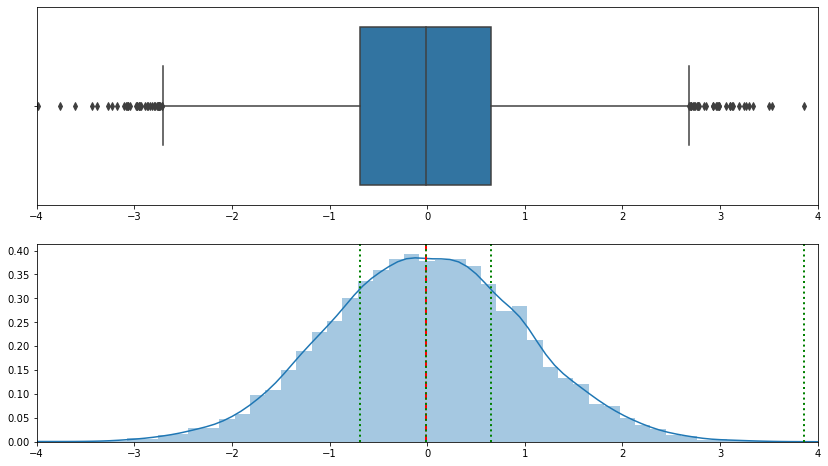

In [12]:
normal = np.random.normal(0,1, 10000)
quartiles = pd.DataFrame(normal).quantile([0,0.25,0.5,0.75,1])[0]

fig, axs = plt.subplots(nrows = 2)
fig.set_size_inches(14,8)
plot1 = sns.boxplot(normal, ax = axs[0])
plot1.set(xlim  = (-4,4))

plot2 = sns.distplot(normal, ax = axs[1])
plot2.set(xlim = (-4, 4))

plt.axvline(np.median(normal), color = 'r' , linestyle = 'dashed', linewidth = 2)

for i, q in enumerate (quartiles):
    plt.axvline(q, color = 'g', linestyle = 'dotted', linewidth = 2)

In [100]:
# Let's check if there are still missing values
miss_data = col.isnull().sum()
miss_data

Unnamed: 0      0
sensor_00       0
sensor_01       0
sensor_02       0
sensor_03       0
sensor_04       0
sensor_05       0
sensor_06       0
sensor_07       0
sensor_08       0
sensor_09       0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
sensor_22       0
sensor_23       0
sensor_24       0
sensor_25       0
sensor_26       0
sensor_27       0
sensor_28       0
sensor_29       0
sensor_30       0
sensor_31       0
sensor_32       0
sensor_33       0
sensor_34       0
sensor_35       0
sensor_36       0
sensor_37       0
sensor_38       0
sensor_39       0
sensor_40       0
sensor_41       0
sensor_42       0
sensor_43       0
sensor_44       0
sensor_45       0
sensor_46       0
sensor_47       0
sensor_48       0
sensor_49       0
sensor_50       0
sensor_51       0
machine_stat    0
dtype: int64

In [101]:
# Let's check the statistical report of out data
col.describe()
# The report isnt okay enough has it has large values displayed in some colomns
# This might not help our machine in predicting a better result

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_stat
count,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,...,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000,220320.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,...,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667,1.065677
std,63601.049991,0.402564,3.293904,3.666662,2.418782,144.017702,17.297501,2.140046,2.173755,2.013639,...,11.043727,11.575646,12.836733,15.640325,10.441797,82.239917,19.142425,52.630590,105.693568,0.247846
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,...,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779,0.000000
25%,55079.750000,2.419155,46.310760,50.390620,42.838539,626.620400,69.977213,13.346350,15.856480,15.183740,...,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,182.581000,180.555600,1.000000
50%,110159.500000,2.455556,48.133678,51.649300,44.227428,632.638916,75.576145,13.628470,16.167530,15.451390,...,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,183.049260,199.942100,1.000000
75%,165239.250000,2.499826,49.479160,52.777770,45.312500,637.615723,80.911770,14.539930,16.427950,15.697340,...,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,204.571800,214.699100,1.000000
max,220319.000000,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,...,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000,2.000000


In [102]:
#split data into X and Y data
X = col.iloc[ : ,1:53]
Y = col['machine_stat']
#let's see our X values
X

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_stat
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.05560,201.3889,1
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.31940,203.7037,1
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.45140,203.1250,1
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.18750,201.3889,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,183.04926,231.1921,1
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,183.04926,231.1921,1
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,183.04926,232.0602,1
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,183.04926,234.0856,1


In [103]:
# we are standardizing here because of the Statistical report that gave big values
# for a machine to be efficient enough,  a standardize statistical report values should  have a mean from range 0.0 and a standard deviation 1.0 (unit variance)
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X
# as we can see below, the values of X have been standardized

array([[ 2.31449742e-01, -1.51674693e-01,  6.39386179e-01, ...,
         1.14014446e+00, -1.24016035e-02, -2.64992806e-01],
       [ 2.31449742e-01, -1.51674693e-01,  6.39386179e-01, ...,
         1.14014446e+00, -1.24016035e-02, -2.64992806e-01],
       [ 1.80128627e-01, -7.26133074e-02,  6.39386179e-01, ...,
         1.10715597e+00,  9.49949505e-03, -2.64992806e-01],
       ...,
       [ 6.03810161e-02,  3.27997916e-02, -9.45172778e-02, ...,
         1.08004771e-15,  2.77789845e-01, -2.64992806e-01],
       [ 8.48194055e-02,  3.27997916e-02, -9.45167155e-02, ...,
         1.08004771e-15,  2.96952833e-01, -2.64992806e-01],
       [ 6.03810161e-02,  3.27997916e-02, -9.45167155e-02, ...,
         1.08004771e-15,  2.96952833e-01, -2.64992806e-01]])

In [104]:
#split the model into training and testing set
X_train , X_test , Y_train , Y_test = train_test_split( X , Y , test_size = 0.2 , random_state = 0)
num_rounds = 100 

In [105]:
#implement the Isolation forest algotithm by fitting it
from sklearn.ensemble import IsolationForest
from numpy import quantile, where
Iso = IsolationForest(n_estimators=100, max_samples=256, contamination=0.2, random_state=2018)
pred_iso = Iso.fit(X_test)

In [106]:
#This is to check the normality of the data, The lower the score, the abnormal it is
scores = pred_iso.score_samples(X_test)
print(scores)

[-0.35779164 -0.51246603 -0.35995464 ... -0.48572864 -0.35459362
 -0.37227057]


In [107]:
# This shows the Threshold
# It gives out a particular number where the data changed to abnormality (outlier)
# This value given below would be visualized in a histogram
threshold = quantile(scores, .02)
print(threshold)

-0.5797093682020863


In [108]:
# When the score is lesser than or Equal to where the data changed to abnormal (Threshold), It'd be assigned to the Variable "Index"
# The variable "index" also is the assigned to variable "values"
# The main aim of all these is to visualize it
index = where(scores <= thresh)
values = X_train[index]


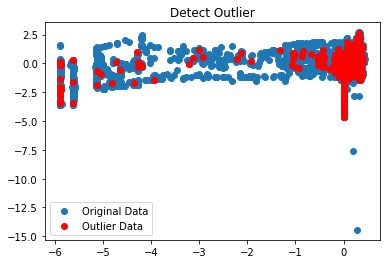

In [109]:
# now let's visualize
# We'd visulaize the original data and the outlier data
plt.title("Detect Outlier")
original_data = plt.scatter(X_test[:,0], X_test[:,1])
Outlier_data = plt.scatter(values[:,0], values[:,1], color='r')
plt.axis('tight')
plt.legend([original_data, Outlier_data],
          ["Original Data", "Outlier Data"])
plt.show()

(array([3.000e+00, 4.000e+00, 5.000e+00, 1.200e+01, 1.600e+01, 2.500e+01,
        1.400e+01, 1.200e+01, 1.100e+01, 1.100e+01, 2.800e+01, 2.600e+01,
        4.600e+01, 1.030e+02, 2.170e+02, 2.030e+02, 1.480e+02, 2.310e+02,
        3.250e+02, 3.370e+02, 6.080e+02, 6.400e+02, 7.390e+02, 8.050e+02,
        8.840e+02, 9.620e+02, 1.078e+03, 7.880e+02, 4.570e+02, 2.860e+02,
        1.370e+02, 9.800e+01, 1.080e+02, 1.210e+02, 1.280e+02, 1.810e+02,
        2.010e+02, 2.410e+02, 3.880e+02, 5.140e+02, 8.580e+02, 1.208e+03,
        1.778e+03, 2.630e+03, 3.842e+03, 5.323e+03, 6.493e+03, 6.414e+03,
        3.763e+03, 6.140e+02]),
 array([-0.70245888, -0.69523237, -0.68800587, -0.68077936, -0.67355285,
        -0.66632634, -0.65909983, -0.65187332, -0.64464681, -0.6374203 ,
        -0.63019379, -0.62296728, -0.61574077, -0.60851426, -0.60128775,
        -0.59406124, -0.58683473, -0.57960822, -0.57238171, -0.5651552 ,
        -0.55792869, -0.55070218, -0.54347568, -0.53624917, -0.52902266,
        -0.

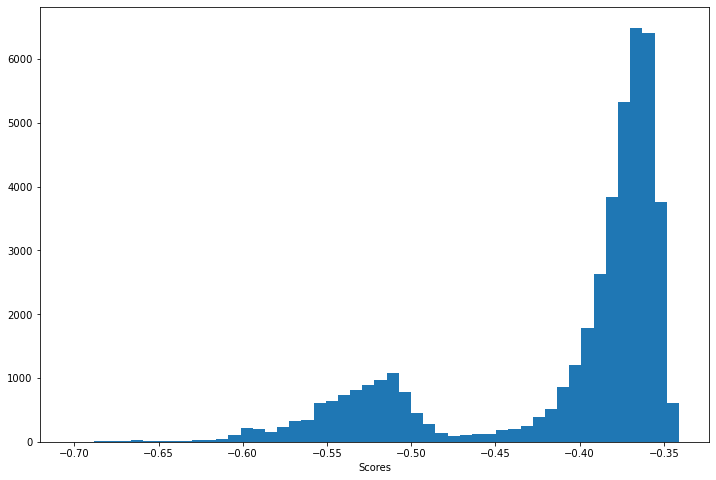

In [110]:
# Let's Visualize with a histogram also
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.xlabel("Scores")
plt.hist(scores, bins = 50)
# Please noe that It detected any values shorter than the -0.57 score on the histogram is an outlier. 